In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from tmu.models.autoencoder.autoencoder import TMAutoEncoder

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [19]:
def load_test_dataset(farm, event_id):
    X = np.loadtxt(f"./data_test/X_{farm}_{event_id}.txt", dtype=np.uint32)
    X = np.array(X).astype(np.uint32)
    return X


def load_train_dataset(farm, event_id):
    X = np.loadtxt(f"./data_train/X_{farm}_{event_id}.txt", dtype=np.uint32)
    X = np.array(X).astype(np.uint32)

    # Take only the first 2000 rows
    X = X[:2000]

    return X


def load_test_labels(farm, event_id):
    y = np.loadtxt(f"./data_test/y_{farm}_{event_id}.txt", dtype=np.uint32)
    y = np.array(y).astype(np.uint32)
    return y


def load_train_labels(farm, event_id):
    y = np.loadtxt(f"./data_train/y_{farm}_{event_id}.txt", dtype=np.uint32)
    y = np.array(y).astype(np.uint32)

    # Take only the first 2000 rows
    y = y[:2000]

    return y

In [20]:
def load_model(filename) -> TMAutoEncoder:
    with open(filename, "rb") as f:
        model = pickle.load(f)

    return model

In [34]:
def calculate_accuracy(labels, predictions):
    # Calculate the accuracy
    accuracy = np.sum(labels == predictions) / len(labels)

    return accuracy

In [41]:
def reconstruction_accuracy(X, pred):
    # For each value of X, if the value is the same as the prediction, then it is correct
    mse_loss = np.mean((X - pred) ** 2)

    #correct = np.sum(X == pred)
    #accuracy = correct / len(X)
    return mse_loss


def hamming_loss(y_true, y_pred):
    return np.mean(y_true != y_pred)


def plot_mse(X, y, pred, name, threshold):
    # Compute MSE for each row
    mse_per_row = [reconstruction_accuracy(X[i], pred[i]) for i in range(len(X))]

    # Plot SNS plot of all MSE values
    plt.figure(figsize=(8, 4))
    sns.histplot(mse_per_row, bins=50, kde=True, color='b')

    # Add a threshold line
    plt.axvline(threshold, color='r', linestyle='--')

    # Save the plot
    plt.savefig(f"./plot_mse_hist_{name}.png")


def run_test(X, y, name):
    print(f"Experiment: {name}")
    print(f"Rows: {len(X)}, Columns: {len(X[0])}")

    tm = load_model("latest_new.pkl")

    pred = tm.predict(X)

    threshold = 0.11

    # For each row in pred, if the MSE is greater than the threshold, then it is an anomaly
    reconstruction_accuracies = [reconstruction_accuracy(X[i], pred[i]) for i in range(len(X))]

    # Print average reconstruction accuracy
    print(f"Average Reconstruction Accuracy: {np.mean(reconstruction_accuracies)}")

    X_predictions = np.array([1 if reconstruction_accuracies[i] > threshold else 0 for i in range(len(X))])

    # Accuracy
    accuracy = calculate_accuracy(y, X_predictions)

    print(f"Accuracy: {accuracy}")

    plot_mse(X, y, pred, name, threshold=threshold)

In [42]:
X_train = load_train_dataset("B", 34)
y_train = load_train_labels("B", 34)

X_test = load_test_dataset("B", 34)
y_test = load_test_labels("B", 34)

Experiment: b_34_train
Rows: 2000, Columns: 315
Average Reconstruction Accuracy: 0.0442015873015873
Accuracy: 0.9915
Experiment: b_34_test
Rows: 4033, Columns: 315
Average Reconstruction Accuracy: 0.1632012090727687
Accuracy: 0.6340193404413588


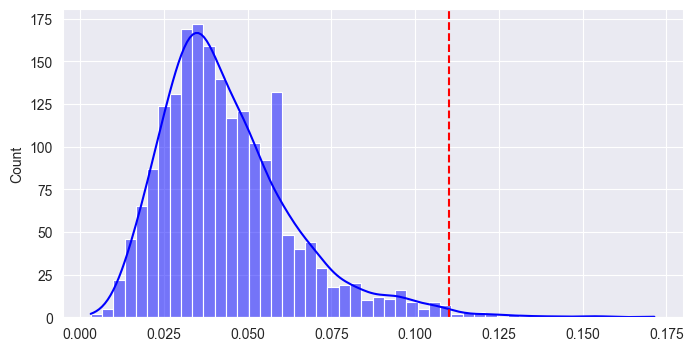

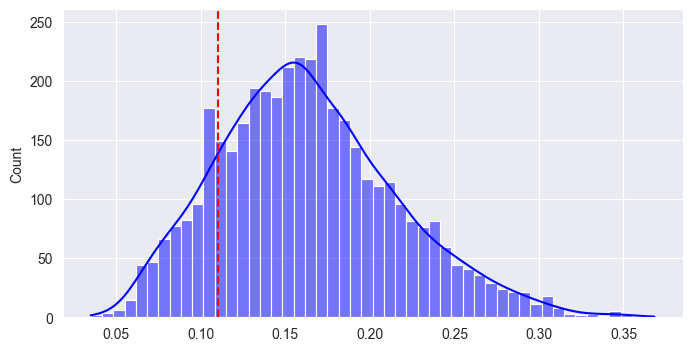

In [43]:
run_test(X_train, y_train, "b_34_train")
run_test(X_test, y_test, "b_34_test")